In [6]:
import sys

sys.path.append('/cluster/home/haroldh/spGDMM/3_src/1_data')

from fetch_data import fetch_data
from create_sample_locations import create_sample_locations

no_sites = 100
time_idx = 285
# Creating biomod training data
sampled_locations = create_sample_locations(no_sites, time_idx)

# Define constants
biomod_sinmod_path = "/cluster/home/haroldh/spGDMM/1_data/1_raw/biostates_surface_normalised.nc"
biomod_target_variables = ['diatoms', 'flagellates', 'ciliates', 'HNANO', 'bacteria', 'calanus_finmarchicus', 'calanus_glacialis','detritus_slow', 'detritus_fast',
                    'nitrate','silicate','ammonium','DOC','cDOM', 'silicate_detritus','sediment_Si','sediment_N']

biomod = fetch_data(biomod_sinmod_path, sampled_locations, type='target', env_variables = biomod_target_variables)

# Define constants
# Here the SINMOD_features dataset must have a 'stat' dimension. ALl features in stat dimension will be used.
path = '/cluster/home/haroldh/spGDMM/1_data/4_interim/SINMOD_features.nc'
target_variables = [
    'temperature', 'salinity'
]

midnor = fetch_data(path, sampled_locations, type='stat', env_variables=target_variables)

In [2]:
import pandas as pd
results = []
for time_index in range(1,360,1):

    sampled_locations = create_sample_locations(1, time_index)
    result = fetch_sinmod_data(biomod_sinmod_path, sampled_locations, biomod_target_variables, normalise=False)

    results.append(result)

final_results = pd.concat(results)

KeyboardInterrupt: 

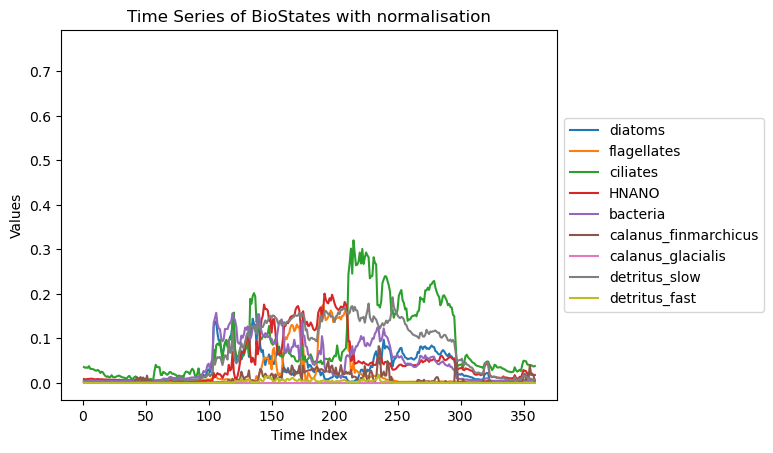

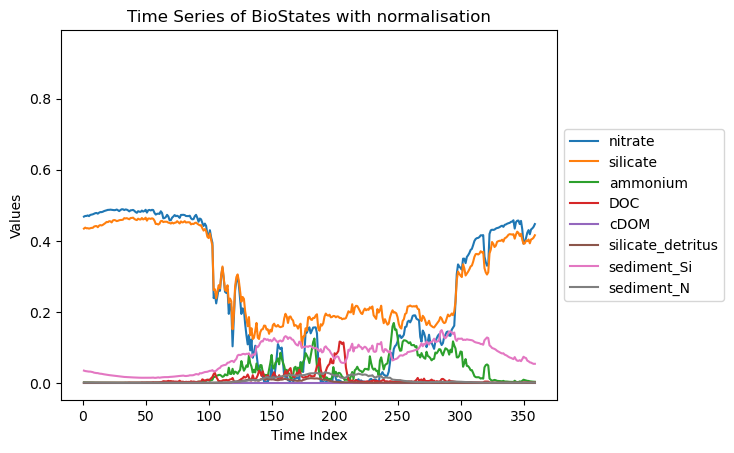

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Plot each column as a time series on the same graph
plt.figure()
for column in final_results.columns[3:12]:
    plt.plot(final_results['time_idx'], final_results[column], label=column)
plt.title('Time Series of BioStates with normalisation')
plt.xlabel('Time Index')
plt.ylabel('Values')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(scale1)
plt.show()

plt.figure()
for column in final_results.columns[12:]:
    plt.plot(final_results['time_idx'], final_results[column], label=column)
plt.title('Time Series of BioStates with normalisation')
plt.xlabel('Time Index')
plt.ylabel('Values')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(scale2)
plt.show()

In [1]:
import sys

sys.path.append('/cluster/home/haroldh/spGDMM/3_src/1_data')

from fetch_sinmod_data import fetch_sinmod_data
from create_sample_locations import create_sample_locations

no_sites = 100
time_idx = 285
# Creating biomod training data
sampled_locations = create_sample_locations(no_sites, time_idx)

# Define constants
biomod_sinmod_path = "/cluster/home/haroldh/spGDMM/1_data/1_raw/biostates_surface_normalised.nc"
biomod_target_variables = ['diatoms', 'flagellates', 'ciliates', 'HNANO', 'bacteria', 'calanus_finmarchicus', 'calanus_glacialis','detritus_slow', 'detritus_fast',
                    'nitrate','silicate','ammonium','DOC','cDOM', 'silicate_detritus','sediment_Si','sediment_N']

biomod = fetch_sinmod_data(biomod_sinmod_path, sampled_locations, biomod_target_variables, normalise=False)

# Define constants
# Here the SINMOD_features dataset must have a 'stat' dimension. ALl features in stat dimension will be used.
path = '/cluster/home/haroldh/spGDMM/1_data/4_interim/SINMOD_features.nc'
target_variables = [
    'temperature', 'salinity'
]

midnor = fetch_sinmod_data(path, sampled_locations, target_variables, target=False)

In [2]:
import pandas as pd
results = []
for time_index in range(1,360,1):

    sampled_locations = create_sample_locations(1, time_index)
    result = fetch_sinmod_data(biomod_sinmod_path, sampled_locations, biomod_target_variables)

    results.append(result)

final_results_2 = pd.concat(results)

In [4]:
final_results_2


0    1.939374
0    1.958424
0    1.938669
0    1.910919
0    1.906110
       ...   
0    1.724804
0    1.708565
0    1.729697
0    1.733831
0    1.692644
Length: 359, dtype: float64

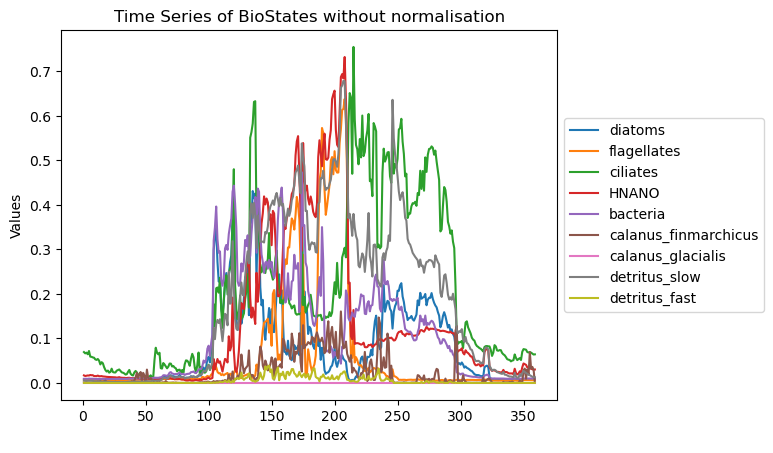

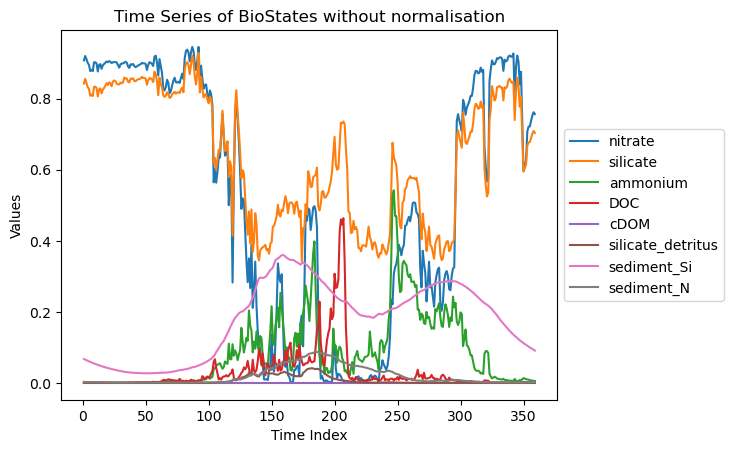

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Plot each column as a time series on the same graph
plt.figure()
for column in final_results_2.columns[3:12]:
    plt.plot(final_results_2['time_idx'], final_results_2[column], label=column)
plt.title('Time Series of BioStates without normalisation')
plt.xlabel('Time Index')
plt.ylabel('Values')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
scale1 = plt.gca().get_ylim()
plt.show()

plt.figure()
for column in final_results_2.columns[12:]:
    plt.plot(final_results_2['time_idx'], final_results_2[column], label=column)
plt.title('Time Series of BioStates without normalisation')
plt.xlabel('Time Index')
plt.ylabel('Values')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
scale2 = plt.gca().get_ylim()
plt.show()rmalise=True)

# Save the scale for later use



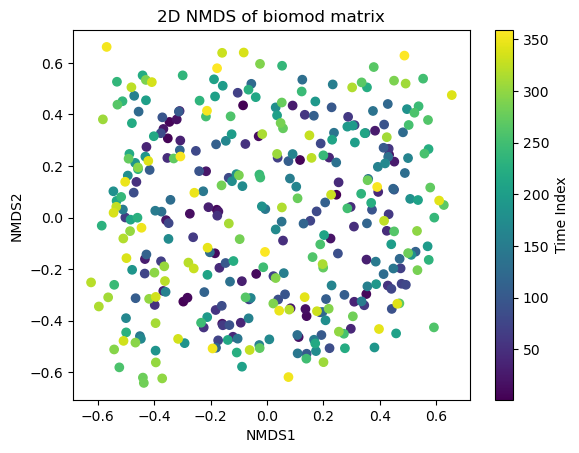

Stress: 0.3006401577104427


In [22]:
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract the biomod matrix from column 4 onward
biomod_matrix = final_results.iloc[:, 3:].values

# Run NMDS
nmds = MDS(n_components=2, metric=False, max_iter=500, random_state=42, dissimilarity='precomputed')
# Compute the Bray-Curtis dissimilarity matrix
dissimilarity_matrix = squareform(pdist(biomod_matrix, metric='braycurtis'))

# Fit NMDS with the precomputed dissimilarity matrix
nmds_fit = nmds.fit_transform(dissimilarity_matrix)

# Plot the NMDS result, color by time_index
plt.figure()
sc = plt.scatter(nmds_fit[:, 0], nmds_fit[:, 1], c=final_results['time_idx'], cmap='viridis')
plt.colorbar(sc, label='Time Index')
plt.title('2D NMDS of biomod matrix')
plt.xlabel('NMDS1')
plt.ylabel('NMDS2')
plt.show()

print(f"Stress: {nmds.stress_}")


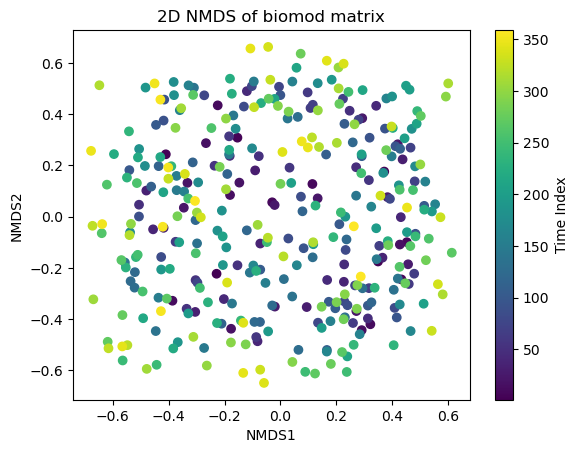

Stress: 0.2997079202284641


In [3]:
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract the biomod matrix from column 4 onward
biomod_matrix2 = final_results_2.iloc[:, 3:].values

# Run NMDS
nmds2 = MDS(n_components=2, metric=False, max_iter=500, random_state=43, dissimilarity='precomputed')
# Compute the Bray-Curtis dissimilarity matrix
dissimilarity_matrix2 = squareform(pdist(biomod_matrix2, metric='braycurtis'))

# Fit NMDS with the precomputed dissimilarity matrix
nmds_fit2 = nmds2.fit_transform(dissimilarity_matrix2)

# Plot the NMDS result, color by time_index
plt.figure()
sc = plt.scatter(nmds_fit2[:, 0], nmds_fit2[:, 1], c=final_results_2['time_idx'], cmap='viridis')
plt.colorbar(sc, label='Time Index')
plt.title('2D NMDS of biomod matrix')
plt.xlabel('NMDS1')
plt.ylabel('NMDS2')
plt.show()

print(f"Stress: {nmds2.stress_}")


0.20885695660076034


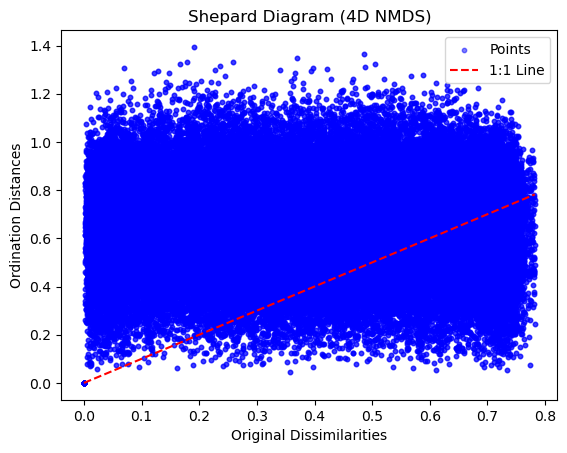

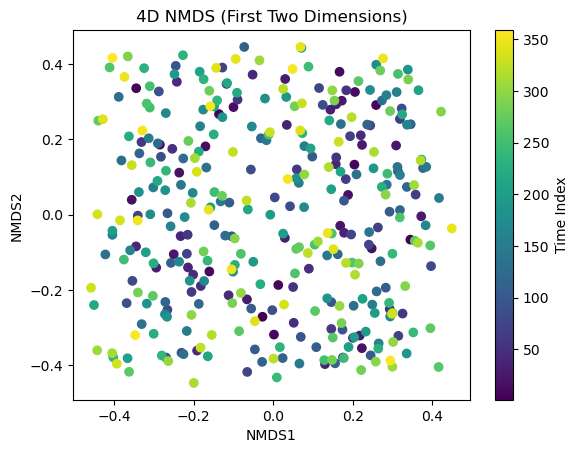

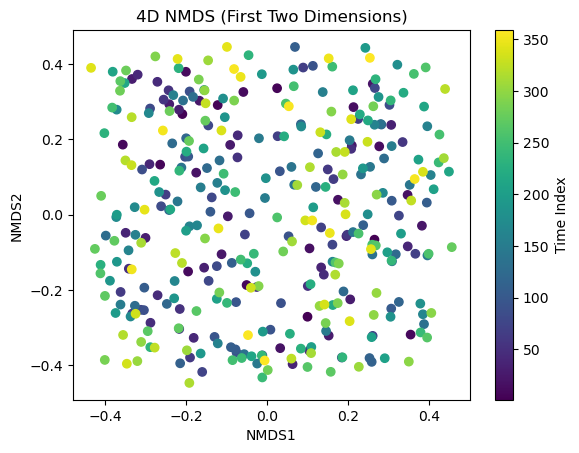

In [32]:
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import numpy as np

# Extract the biomod matrix from column 4 onward
biomod_matrix2 = final_results_2.iloc[:, 3:].values

# Compute the Bray-Curtis dissimilarity matrix
dissimilarity_matrix2 = squareform(pdist(biomod_matrix2, metric='braycurtis'))

# Run 4D NMDS
nmds2 = MDS(n_components=4, metric=False, max_iter=500, random_state=42, dissimilarity='precomputed')
nmds_fit2 = nmds2.fit_transform(dissimilarity_matrix2)

print(nmds2.stress_)

# Extract the 4D coordinates
nmds1, nmds2, nmds3, nmds4 = nmds_fit2.T

# Plot Shepard diagram
# Compute ordination distances in 4D
ordination_distances = np.sqrt(np.sum((nmds_fit2[:, np.newaxis, :] - nmds_fit2[np.newaxis, :, :])**2, axis=2)).flatten()

# Original dissimilarities
original_dissimilarities = dissimilarity_matrix2.flatten()

plt.figure()
plt.scatter(original_dissimilarities, ordination_distances, s=10, c='blue', alpha=0.5, label='Points')
plt.plot([original_dissimilarities.min(), original_dissimilarities.max()],
         [original_dissimilarities.min(), original_dissimilarities.max()], 'r--', label='1:1 Line')
plt.xlabel('Original Dissimilarities')
plt.ylabel('Ordination Distances')
plt.title('Shepard Diagram (4D NMDS)')
plt.legend()
plt.show()

# Optional: Verify the 4D coordinates (e.g., scatterplot of first two dimensions, color by time_index)
plt.figure()
sc = plt.scatter(nmds1, nmds2, c=final_results_2['time_idx'], cmap='viridis')
plt.colorbar(sc, label='Time Index')
plt.title('4D NMDS (First Two Dimensions)')
plt.xlabel('NMDS1')
plt.ylabel('NMDS2')
plt.show()

plt.figure()
sc = plt.scatter(nmds3, nmds2, c=final_results_2['time_idx'], cmap='viridis')
plt.colorbar(sc, label='Time Index')
plt.title('4D NMDS (First Two Dimensions)')
plt.xlabel('NMDS1')
plt.ylabel('NMDS2')
plt.show()



In [34]:
biomod.to_csv('/cluster/home/haroldh/spGDMM/1_data/2_processed/training/biomod.csv', index=False)

In [8]:
midnor.to_csv('/cluster/home/haroldh/spGDMM/1_data/2_processed/training/midnor.csv', index=False)